In [133]:
import numpy as np
import pandas as pd
import os

data=pd.read_excel("Almaty_v5_test_copy B.xlsx")

data['Model']=data['Model'].str.strip()
data['Price']=data['Price'].str.strip()

data.head()

,Unnamed: 0,Unnamed: 0.1,City,Mark,Model,Price,Year,Body,EngineSize,FuelType,GearboxType,Mileage,Color
0,0,0,Алматы,Renault,Logan\tDrive,7 207 680,2020.0,седан,1.6,бензин,автомат,NaN,металлик
1,1,1,Алматы,Toyota,Avensis,4 200 000,2003.0,седан,2.0,бензин,автомат,200000.0,серебристый
2,2,2,Алматы,Renault,Sandero\tStepway\tLife,7 056 000,2020.0,хэтчбек,1.6,бензин,автомат,NaN,NaN
3,3,3,Алматы,Mitsubishi,Delica,12 500 000,2006.0,микроавтобус,3.0,бензин,автомат,180000.0,серебристый
4,4,4,Алматы,Infiniti,QX80,28 050 000,2018.0,внедорожник,5.6,бензин,автомат,22000.0,белый


In [134]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18837 entries, 0 to 18836
Data columns (total 13 columns):
Unnamed: 0      18837 non-null int64
Unnamed: 0.1    18837 non-null int64
City            18836 non-null object
Mark            18836 non-null object
Model           18837 non-null object
Price           18836 non-null object
Year            18836 non-null float64
Body            18835 non-null object
EngineSize      18799 non-null float64
FuelType        18810 non-null object
GearboxType     16948 non-null object
Mileage         9741 non-null float64
Color           12078 non-null object
dtypes: float64(3), int64(2), object(8)
memory usage: 1.9+ MB


In [136]:
data.describe()

,Unnamed: 0,Unnamed: 0.1,Year,EngineSize,Mileage
count,18837.000000,18837.000000,18836.000000,18799.000000,9.741000e+03
mean,9418.000000,9418.000000,2004.707103,2.503702,1.688546e+05
std,5437.917846,5437.917846,9.211813,0.996299,1.480512e+05
min,0.000000,0.000000,1938.000000,0.100000,3.000000e+00
25%,4709.000000,4709.000000,1997.000000,1.800000,7.700000e+04
50%,9418.000000,9418.000000,2006.000000,2.300000,1.450000e+05
75%,14127.000000,14127.000000,2013.000000,3.000000,2.300000e+05
max,18836.000000,18836.000000,2021.000000,8.000000,3.333000e+06


In [137]:
data.isnull().sum()

Unnamed: 0         0
Unnamed: 0.1       0
City               1
Mark               1
Model              0
Price              1
Year               1
Body               2
EngineSize        38
FuelType          27
GearboxType     1889
Mileage         9096
Color           6759
dtype: int64

In [138]:
data.shape

(18837, 13)

In [139]:
data = data.dropna(how='any',axis=0)

In [140]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'City', 'Mark', 'Model', 'Price', 'Year',
       'Body', 'EngineSize', 'FuelType', 'GearboxType', 'Mileage', 'Color'],
      dtype='object')

In [141]:
data.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
City            0
Mark            0
Model           0
Price           0
Year            0
Body            0
EngineSize      0
FuelType        0
GearboxType     0
Mileage         0
Color           0
dtype: int64

In [142]:
data["Mark"].unique()

array(['Toyota', 'Mitsubishi', 'Infiniti', 'Nissan', 'ВАЗ', 'Volkswagen',
       'Mercedes-Benz', 'Hyundai', 'Porsche', 'Land', 'Kia', 'Lexus',
       'Foton', 'Mazda', 'Chevrolet', 'Lifan', 'Mercedes-Maybach', 'ГАЗ',
       'BMW', 'Opel', 'Renault', 'Skoda', 'Audi', 'Subaru', 'Honda',
       'JAC', 'Volvo', 'Hummer', 'ИЖ', 'Daewoo', 'SsangYong', 'УАЗ',
       'Suzuki', 'Peugeot', 'Ford', 'ЗАЗ', 'Chrysler', 'Tesla', 'Mini',
       'GMC', 'Ravon', 'Citroen', 'Maserati', 'Jeep', 'Lincoln', 'Jaguar',
       'BYD', 'Dodge', 'Geely', 'Bentley', 'Cadillac', 'Plymouth',
       'Great', 'FAW', 'Maybach', 'Ретро-автомобили', 'MG', 'Fiat',
       'Rover', 'Chery', 'Rolls-Royce', 'DongFeng', 'Pontiac', 'Alfa',
       'Acura', 'Changan', 'Scion', 'Genesis', 'Datsun', 'Seat',
       'Москвич', 'Smart', 'ЛуАЗ', 'Haima'], dtype=object)

In [143]:
list(data.Mark).count('Ретро-автомобили')

4

In [144]:
data.shape

(8679, 13)

In [145]:
index_names=data[data['Mark']=='Ретро-автомобили'].index
data.drop(index_names, inplace=True)

In [146]:
data.shape

(8675, 13)

In [147]:
data.loc[data.duplicated()]

,Unnamed: 0,Unnamed: 0.1,City,Mark,Model,Price,Year,Body,EngineSize,FuelType,GearboxType,Mileage,Color


In [148]:
data.drop("Unnamed: 0.1",axis=1)

,Unnamed: 0,City,Mark,Model,Price,Year,Body,EngineSize,FuelType,GearboxType,Mileage,Color
1,1,Алматы,Toyota,Avensis,4 200 000,2003.0,седан,2.0,бензин,автомат,200000.0,серебристый
3,3,Алматы,Mitsubishi,Delica,12 500 000,2006.0,микроавтобус,3.0,бензин,автомат,180000.0,серебристый
4,4,Алматы,Infiniti,QX80,28 050 000,2018.0,внедорожник,5.6,бензин,автомат,22000.0,белый
6,6,Алматы,Nissan,Patrol,11 500 000,2012.0,внедорожник,5.6,бензин,автомат,105000.0,белый
8,8,Алматы,ВАЗ,(Lada)\tLargus\tCross,4 800 000,2019.0,минивэн,1.6,бензин,механика,90000.0,черный
...,...,...,...,...,...,...,...,...,...,...,...,...
18828,18828,Алматы,ВАЗ,(Lada)\t2170\t(седан),2 000 000,2015.0,седан,6.0,бензин,механика,85000.0,белый
18829,18829,Алматы,Dodge,Charger,3 300 000,2009.0,седан,3.5,бензин,автомат,73000.0,черный
18831,18831,Алматы,Dodge,Magnum,2 900 000,2008.0,универсал,5.7,бензин,автомат,73000.0,черный
18832,18832,Алматы,Chrysler,300C,2 900 000,2009.0,седан,3.5,бензин,автомат,72000.0,черный


In [149]:
data.drop_duplicates()

,Unnamed: 0,Unnamed: 0.1,City,Mark,Model,Price,Year,Body,EngineSize,FuelType,GearboxType,Mileage,Color
1,1,1,Алматы,Toyota,Avensis,4 200 000,2003.0,седан,2.0,бензин,автомат,200000.0,серебристый
3,3,3,Алматы,Mitsubishi,Delica,12 500 000,2006.0,микроавтобус,3.0,бензин,автомат,180000.0,серебристый
4,4,4,Алматы,Infiniti,QX80,28 050 000,2018.0,внедорожник,5.6,бензин,автомат,22000.0,белый
6,6,6,Алматы,Nissan,Patrol,11 500 000,2012.0,внедорожник,5.6,бензин,автомат,105000.0,белый
8,8,8,Алматы,ВАЗ,(Lada)\tLargus\tCross,4 800 000,2019.0,минивэн,1.6,бензин,механика,90000.0,черный
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18828,18828,18828,Алматы,ВАЗ,(Lada)\t2170\t(седан),2 000 000,2015.0,седан,6.0,бензин,механика,85000.0,белый
18829,18829,18829,Алматы,Dodge,Charger,3 300 000,2009.0,седан,3.5,бензин,автомат,73000.0,черный
18831,18831,18831,Алматы,Dodge,Magnum,2 900 000,2008.0,универсал,5.7,бензин,автомат,73000.0,черный
18832,18832,18832,Алматы,Chrysler,300C,2 900 000,2009.0,седан,3.5,бензин,автомат,72000.0,черный


In [150]:
import seaborn as sns

In [151]:
data=pd.read_excel("Almaty_vv2.xlsx")

In [152]:
data.head()

,City,Mark,Model,Price,Year,Body,EngineSize,FuelType,GearboxType,Mileage,Color
0,Алматы,Toyota,Avensis,4200000,2003,седан,2.0,бензин,автомат,200000,серебристый
1,Алматы,Mitsubishi,Delica,12500000,2006,микроавтобус,3.0,бензин,автомат,180000,серебристый
2,Алматы,Infiniti,QX80,28050000,2018,внедорожник,5.6,бензин,автомат,22000,белый
3,Алматы,Nissan,Patrol,11500000,2012,внедорожник,5.6,бензин,автомат,105000,белый
4,Алматы,ВАЗ,(Lada)\tLargus\tCross,4800000,2019,минивэн,1.6,бензин,механика,90000,черный


In [153]:
data.dtypes

City            object
Mark            object
Model           object
Price            int64
Year             int64
Body            object
EngineSize     float64
FuelType        object
GearboxType     object
Mileage          int64
Color           object
dtype: object

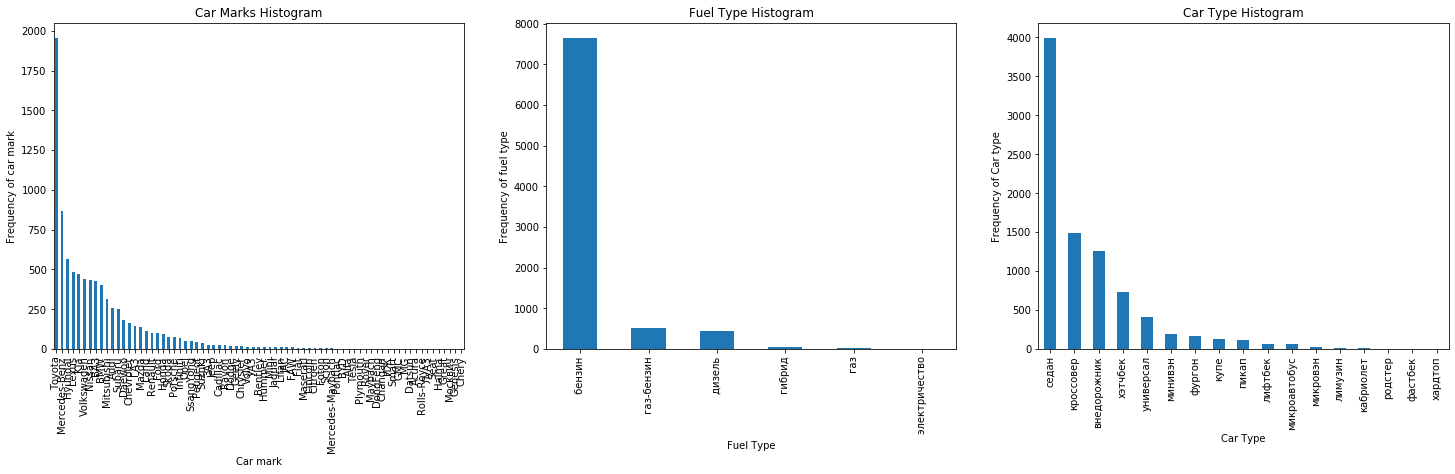

In [154]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = data.Mark.value_counts().plot.bar()
plt.title('Car Marks Histogram')
plt1.set(xlabel = 'Car mark', ylabel='Frequency of car mark')

plt.subplot(1,3,2)
plt1 = data.FuelType.value_counts().plot.bar()
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = data.Body.value_counts().plot.bar()
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

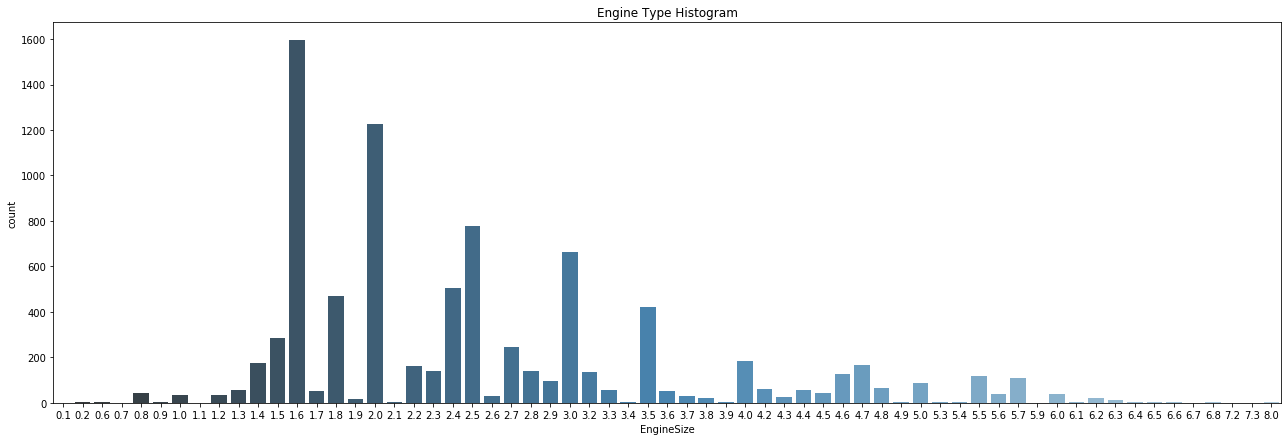

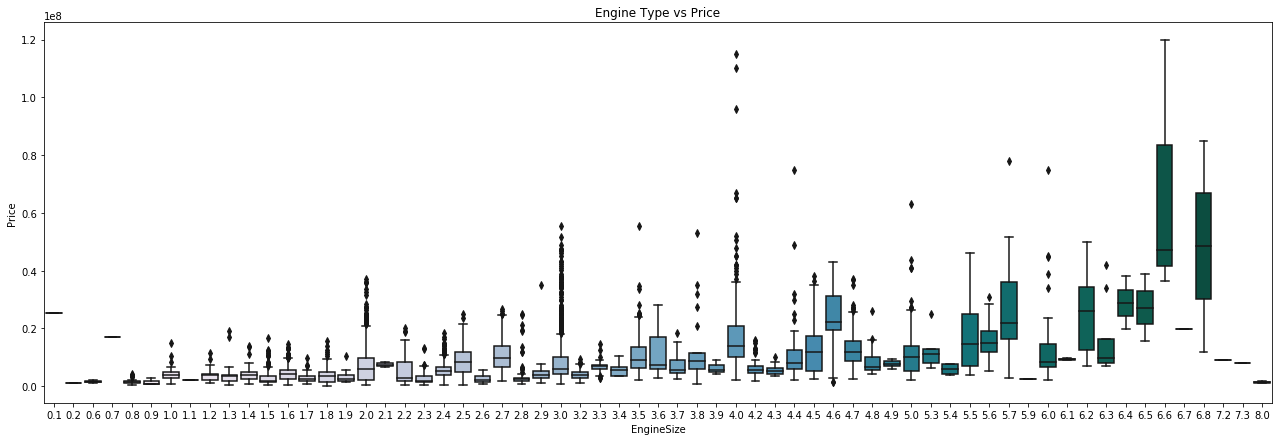

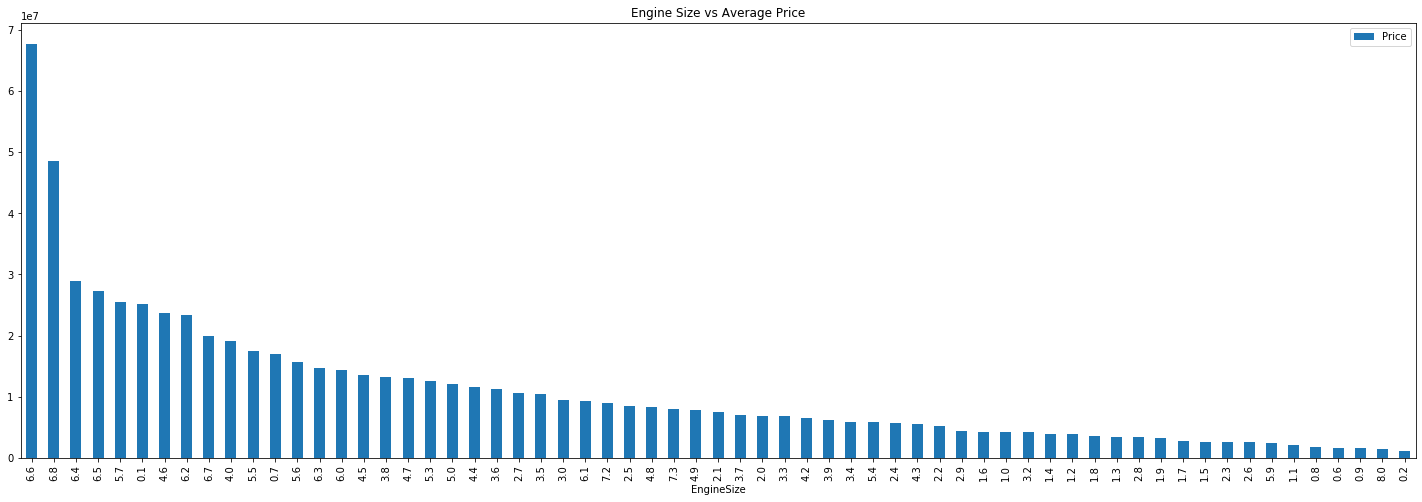

In [155]:
plt.figure(figsize=(22,7))
plt.title('Engine Type Histogram')
sns.countplot(data.EngineSize, palette=("Blues_d"))
plt.show()

plt.figure(figsize=(22,7))
plt.title('Engine Type vs Price')
sns.boxplot(x=data.EngineSize, y=data.Price, palette=("PuBuGn"))
plt.show()

df = pd.DataFrame(data.groupby(['EngineSize'])['Price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(25,8))
plt.title('Engine Size vs Average Price')
plt.show()